# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


Observations:
* The dataframe has 9 columns.
* Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
df.shape

(1898, 9)

Observations: The data has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observations:
Of the 9 columns in the dataset, 4 are of type int, 4 are of type object and 1 is of type float. Rating is of object type which is unexpected, it may have string values mixed with float values.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]


In [6]:
# Checking for any null values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Observations:
There are no missing or null values in the data. This is also exemplified by the fact that in the df.info output, the count of non-null values for each columns is equal to the total no. of rows in the dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]


In [8]:
# Print statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


Observations:
* Once an order is placed, the minimum, average and maximum time it takes for food to be prepared are 20 minutes, 27.37 minutes and 35 minutes respectively.
* order_id and customer_id are identifier columns. Apart from count, their statistical summary datapoints have no actionable meaning.
* cost_of_the_order ranges from \$4.47 (min.) to \$35.41 (max.) with a average cost of \$16.49.
* delivery_time range from 15 (min.) to 33 minutes (max.) with an average of 24.16 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# Get freq of each rating
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [10]:
# Get freq of each rating as % of all orders
df['rating'].value_counts(normalize=True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

Observations: 736 orders are not rated, which is 39% of all the orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### column '**order_id**':
* This dataset has info on 1898 unique orders.

In [11]:
df['order_id'].nunique()

1898

### column '**customer_id**':
* These orders were provided by 1200 unique customers.

In [12]:
df['customer_id'].nunique()

1200

### column '**restaurant_name**':
* The dataset covers 178 unique restaurants.

In [13]:
df['restaurant_name'].nunique()

178

### column '**cuisine_type**':
* There are 14 unique cusine types represented in the data.
* Most popular cuisines are American, followed by Japanese and then Italian.
* These top 3 cuisines account for 71.23% of all orders.

In [14]:
df['cuisine_type'].nunique()

14

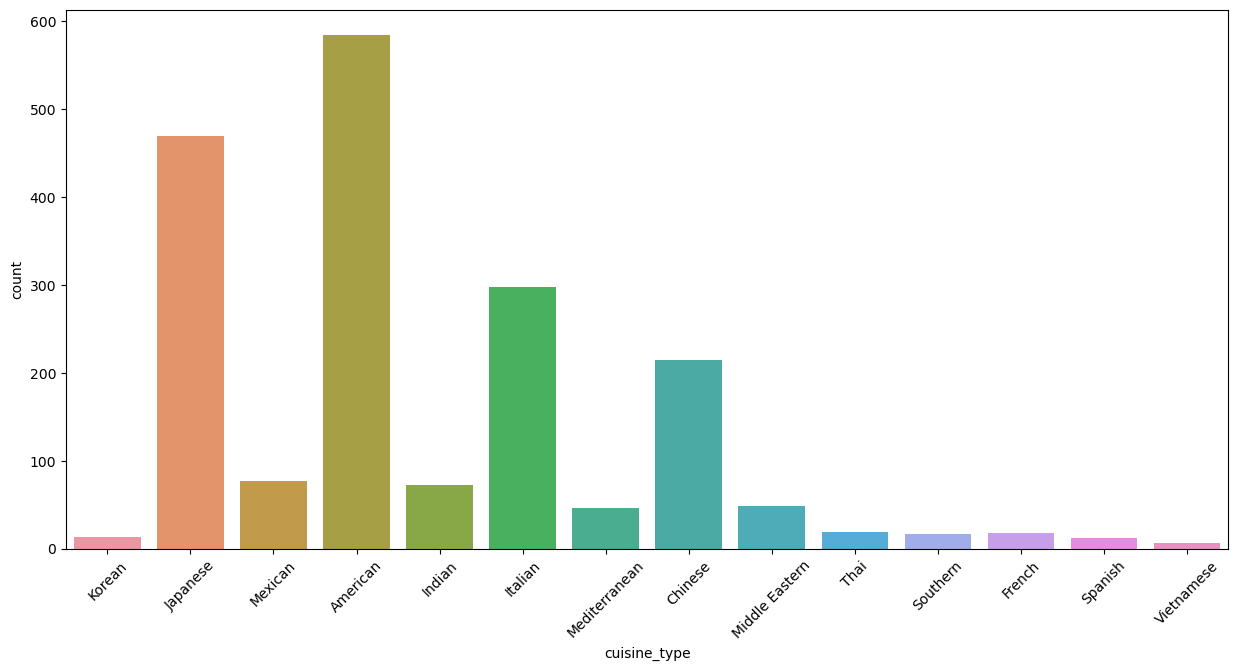

In [17]:
# Plot count of orders by cuisine type
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Find what % of all orders are American, Japanese and Italian
cuisine_list = ['American', 'Japanese', 'Italian']
round((df[df['cuisine_type'].isin(cuisine_list)].shape[0]/df.shape[0])*100,2)

71.23

### column **'cost_of_the_order'**:
* The total cost of all orders in this dataset is \$31,314.82.
* Cost of orders has a right-skewed distribution. The ideal histogram binwidth for this column is \$1.65.
* There are no outliers. The boxplot indicates that the median cost of order is ~\$14.
* There seem to be 3 local maxima/modes or most popular price points, around \$12, \$24 and \$29.
* 50% of the orders cost between \$10 and \$20.

In [19]:
# Total cost of all orders
df['cost_of_the_order'].sum()

31314.82

In [20]:
# Define a new function to get ideal bin size for histograms
def get_bins(data, col_name):
  summary = data.describe()                                      #store statistical summary of dataset in a temp dataframe
  binwidth = (2*(summary[col_name][6]-summary[col_name][4]))/summary[col_name][0]**(1/3)         #binwidth = 2*IQR/n^(1/3)
  print("Ideal binwidth for "+ str(col_name) + " in this dataset is " + str(round(binwidth,2)))
  return int((summary[col_name][7]-summary[col_name][3])/binwidth)                                #bins = range/binwidth

Ideal binwidth for cost_of_the_order in this dataset is 1.65


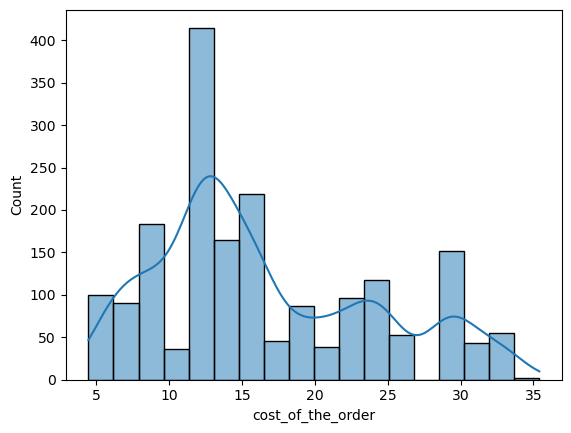

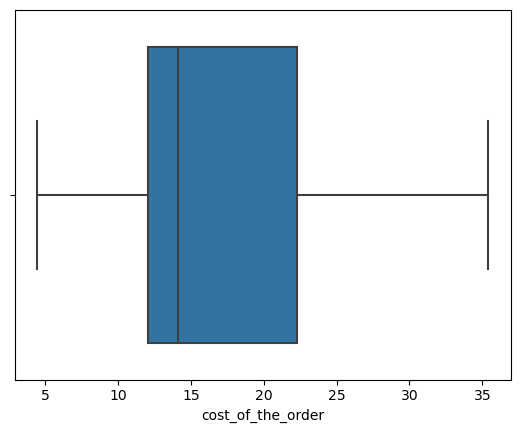

In [21]:
# Hist and boxplots for cost of order
sns.histplot(data=df,x='cost_of_the_order', bins = get_bins(df, 'cost_of_the_order'), kde=True)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

In [22]:
# Find the most common order cost
round(((df[df.cost_of_the_order<10].shape[0] + df[df.cost_of_the_order>20].shape[0])/df.shape[0])*100,2)

50.0

### column '**day_of_the_week**':
* The dataset classifies all orders as placed either on Weekends or on Weekdays.
* 71.18% of all orders are placed on weekends which means there is significantly more activity on the platform on weekends.

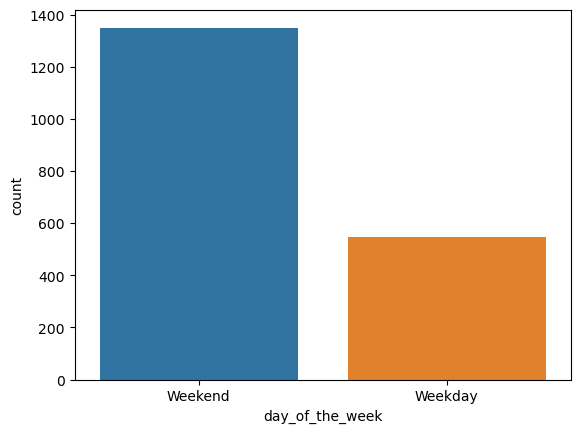

In [23]:
# Plot no. of orders by day of the week
sns.countplot(data=df, x='day_of_the_week');

In [24]:
# Find % of orders placed on weekends and weekdays
df['day_of_the_week'].value_counts(normalize=True)

Weekend    0.711802
Weekday    0.288198
Name: day_of_the_week, dtype: float64

### column '**rating**':
* There are 4 unique values in the ratings column.
* Ratings were not provided for 736 orders (38.7% of all orders).
* 30.9% of all orders (588) had a rating of 5
* 20.3% of all orders (386) had a rating of 4
* 9.9% of all orders (188) had a rating of 3.

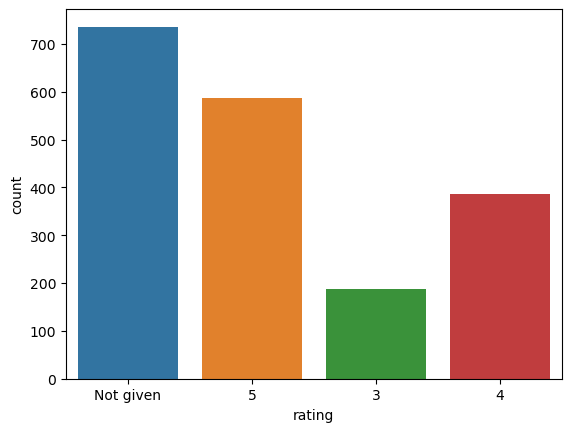

In [25]:
# Plot no. of orders by ratings
sns.countplot(data=df, x='rating');

In [26]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [27]:
df['rating'].value_counts(normalize=True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

### column '**food_preparation_time**':
* The distribution of this column appears to be near symmetric/uniform with a very slight skew to the right.
* Food preparation time ranges from 20 to 35 minutes, with a median at 27 minutes.
* The ideal histogram binwidth for this column is 1.29 minutes. There are no outliers.

Ideal binwidth for food_preparation_time in this dataset is 1.29


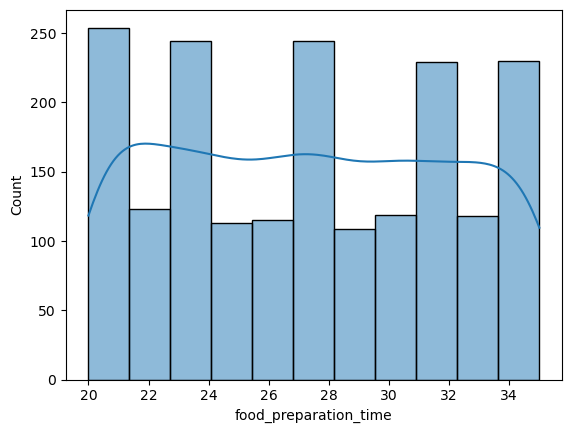

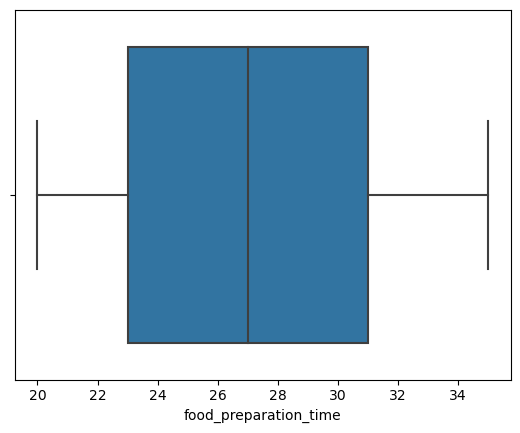

In [29]:
# Hist and box plots of food preparation time
sns.histplot(data=df, x='food_preparation_time', bins = get_bins(df, 'food_preparation_time'), kde=True)
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

### column '**delivery_time**':
* The distribution of this column is slightly left skewed.
* Delivery time ranges from 15 to 33 minutes, with a median at 25 minutes.
* The ideal histogram binwidth for this this column is also 1.29 minutes. There are no outliers.
* Almost 70% of all orders take between 20 to 30 minutes to deliver.

Ideal binwidth for delivery_time in this dataset is 1.29


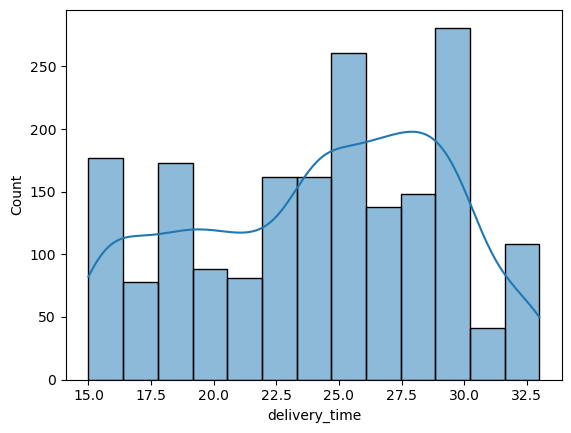

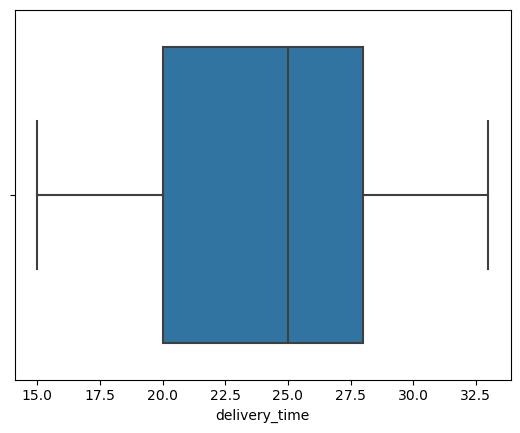

In [30]:
# Hist and box plots for delivery time
sns.histplot(data=df, x='delivery_time', bins = get_bins(df, 'delivery_time'), kde=True)
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()

In [31]:
# Find most common delivery time range
100 - round(((df[df.delivery_time<20].shape[0] + df[df.delivery_time>30].shape[0])/df.shape[0])*100,2)

69.6

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

The top 5 restaurants which received the most orders are
1. Shake Shack (219 orders)
2. The Meatball Shop (132 orders)
3. Blue Ribbon Sushi (119 orders)
4. Blue Ribbon Fried Chicken (96 orders)
5. Parm (68 orders).

In [32]:
# Top 5 restaurants by no. of orders
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]
The most popular cuisine on weekends is American.

In [33]:
# Filter rows where day of the week is weekend and find the top cuisine
df.loc[df['day_of_the_week']=='Weekend', 'cuisine_type'].value_counts().head(1)

American    415
Name: cuisine_type, dtype: int64

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

29.24% of the orders cost more than 20 dollars.

In [34]:
# Filter by cost >20 and find what % this is of total orders
round((df[df['cost_of_the_order']>20].shape[0]/df.shape[0])*100,2)

29.24

### **Question 10**: What is the mean order delivery time? [1 mark]

The mean order delivery time is 24.16 minutes.

In [35]:
round(df['delivery_time'].mean(),2)

24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

The IDs of the top 3 most frequent customers eligible for the 20% discount vouchers are:
1. 52832 (13 orders placed)
2. 47440 (10 orders placed)
3. 83287 (9 orders placed)

In [36]:
# Find top customers by freq of orders placed
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Customers and no. of orders
* The maximum no. orders per customer is 13 and minimum is 1 order.
* 87.58% of the customers have ordered once or twice.
* Only 149 customers have ordered 3 or more times.

In [37]:
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

In [38]:
# Find % of customers who've placed 1 or 2 orders
round((((df.groupby('customer_id')['order_id'].count().sort_values(ascending=False)<=2).sum()/1200)*100),2)

87.58

In [40]:
# Find no. of customers who've placed 3 or more orders
(df.groupby('customer_id')['order_id'].count().sort_values(ascending=False)>2).sum()

149

### Customers and cost of orders

*   The highest total cost of order by any customer in this dataset is \$225.8 and the lowest total order cost is \$4.75, with a mean of \$26.
*   50% of total order cost is coming from the top quarter of 300 customers, i.e. customers who spend the most, by total order cost.
*   The bottom quarter of 300 customers, i.e. customers who spend the leat, account for only 9.37% of total order cost.



In [42]:
# Find total order cost by customer
df_customer = df.groupby('customer_id')['cost_of_the_order'].sum().sort_values(ascending=False).reset_index()
df_customer['cost_of_the_order'].describe().T

count    1200.000000
mean       26.095683
std        20.796383
min         4.750000
25%        12.660000
50%        20.695000
75%        31.430000
max       225.800000
Name: cost_of_the_order, dtype: float64

In [43]:
#Find contribution % of customers who spend most to total order cost volume
round((df_customer.head(300).cost_of_the_order.sum()/df_customer.cost_of_the_order.sum())*100,2)

50.67

In [44]:
#Find contribution % of customers who spend least to total order cost volume
round((df_customer.tail(300).cost_of_the_order.sum()/df_customer.cost_of_the_order.sum())*100,2)

9.37

### Restaurants by no. of orders and day of the week


*   The top 5 restaturants with maximum no. of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm
*   The top 3 overall restaurants retain their spot whether it's a weekday or a weekend. Blue Ribbon Fried Chicken drops a spot on weekdays, replaced by Parm. Parm drops out of the top5 on weekends, replaced by RedFarm Broadway.



In [45]:
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

### Restaturants and cost of orders


*  On average, each restaurant in this list makes \$175.93.
*  The revenue per restaturant ranges from \$5.72 (Hunan Manor) to \$3579.53 (Shake Shack). This makes sense as Shake Shack is the restaurant which received most orders.
* The top 12 restaturants, grouped by cost of orders received, make up 50.51% of the total cost of orders in the dataset.


In [46]:
# Find stat summary of order cost by restaurant
df_restaurants = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).reset_index()
df_restaurants.describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,178.0,175.925955,394.615994,5.72,23.84,54.615,124.8425,3579.53


In [47]:
# Find how many restaurants contribute to majority of the total order cost
round((df_restaurants.head(12)['cost_of_the_order'].sum() / df_restaurants['cost_of_the_order'].sum())*100,2)

50.61

### Top cuisines by no. of orders and day of the week
*   American is the most ordered cuisine, followed by Japanese, Italian, Chinese and Mexican.
*   Least ordered cuisines are Vietnamese, Spanish, Korean, Southern and French.
*   These rankings stay nearly consistent whether it's a weekday or a weekend.




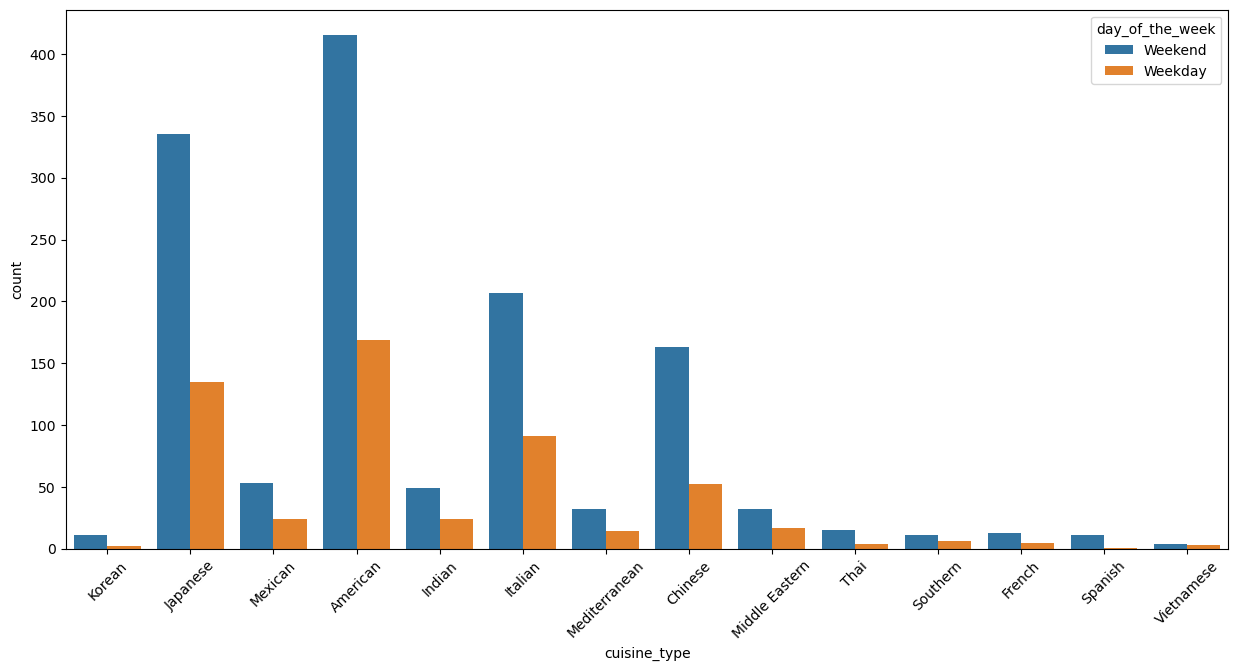

In [48]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=45)
plt.show()

### Cuisine and cost of order


*   French restaturants have the highest median cost of orders among all cuisines. Maybe these restuarants are of the fine-dining type.
*   Korean and Vietnamese restaurants have the lowest median cost of orders among all cuisines. Maybe these restaurants are of the quick-service type.
*   Korean, Mediterranean and Vietnamese cuisines all have outliers. The high cost orders at these restaurants may be group orders or premium food items requiring a long time or high effort to prepare.




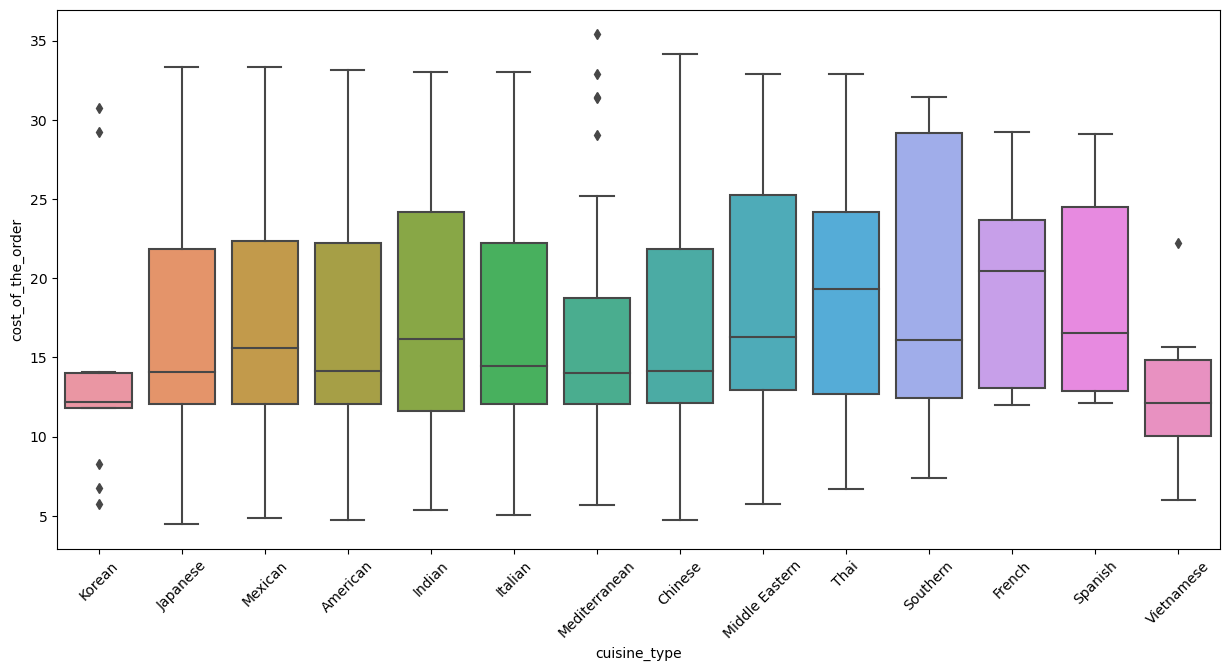

In [49]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x="cuisine_type", y="cost_of_the_order")
plt.xticks(rotation=45)
plt.show()

### Cuisine and food preparation time

*   Italian and Thai restaturants have the highest median food prep time among all cuisines.
*   Korean and Vietnamese restaurants have the lowest median food prep time among all cuisines. Given these restaurants also have the lowest median order cost, it makes sense that they offer small bites that can be prepared quickly.
*   Food prep time for Korean cuisines is right skewed. The high prep time at these restaurants may be premium food items requiring a long time or high effort to prepare.

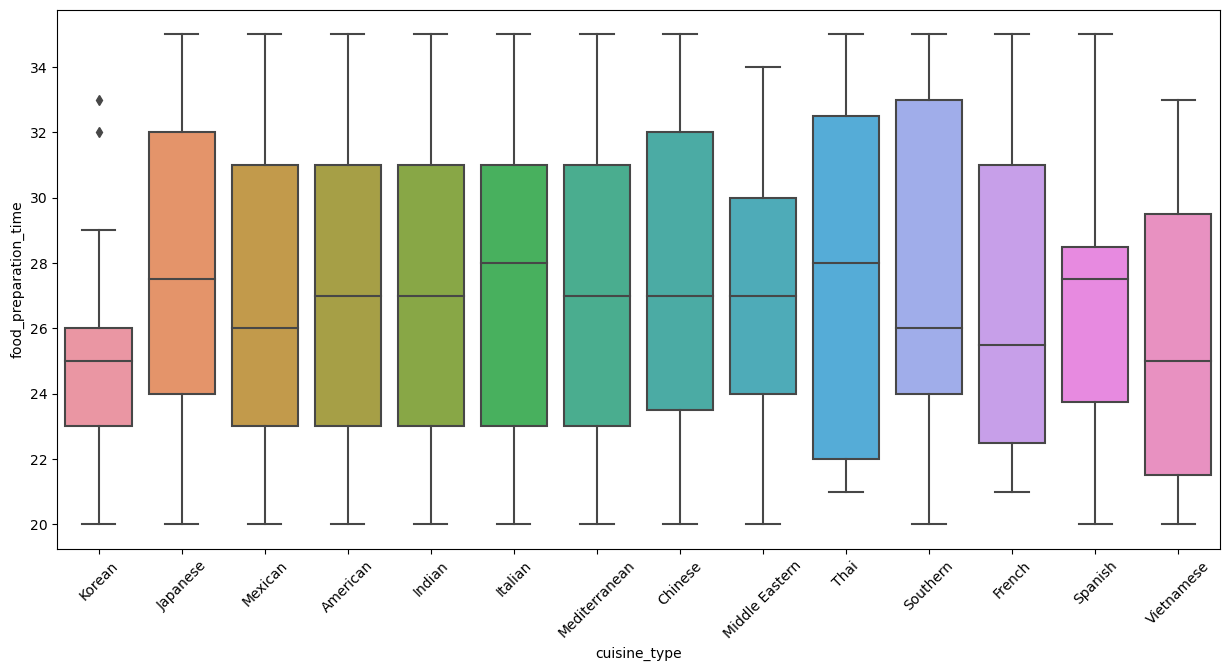

In [50]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation = 45)
plt.show()

### Cuisine and delivery time

*   French, Vietnamese and Italian restaturants have the highest median delivery time among all cuisines.
*   Korean and Spanish restaurants have the lowest median delivery time among all cuisines.
*   Delivery time for Vietnames cuisines is left skewed. Maybe few restaurants are very close to delivery locations.

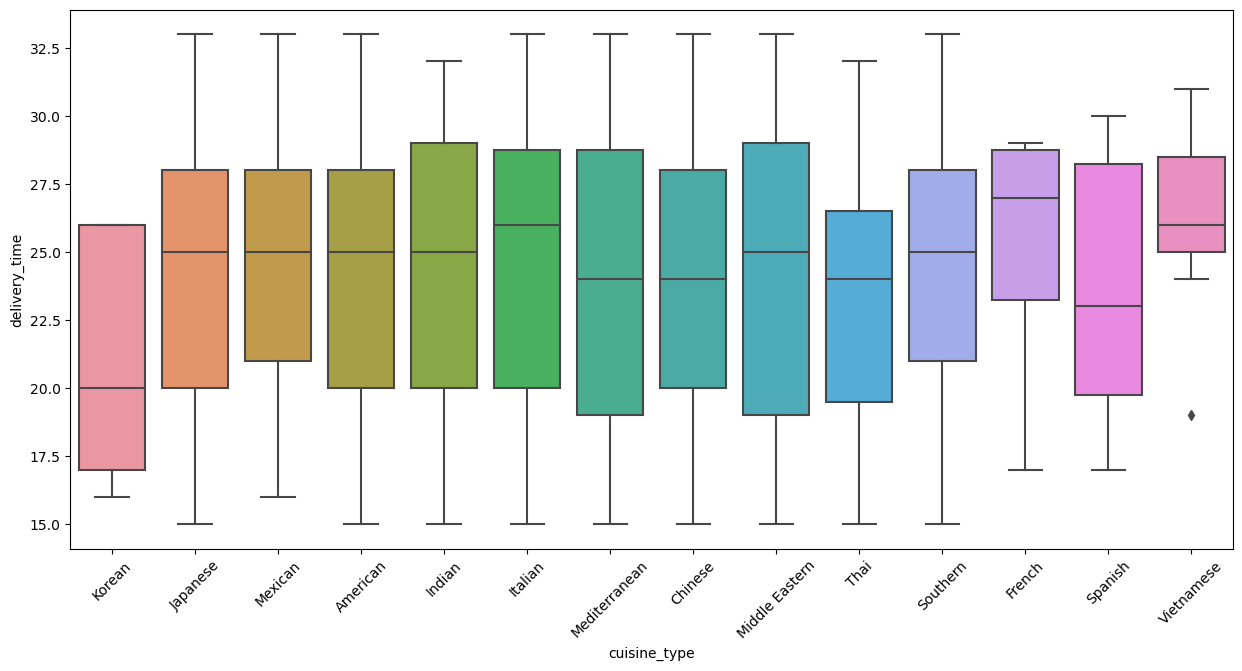

In [51]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y='delivery_time')
plt.xticks(rotation = 45)
plt.show()

### Cuisine and rating

* All cuisine types have mean ratings > 4
* Highest rated cuisine types are Spanish, Thai, Indian, Mexican and Japanese.
* Lowest rated cuisine types are American, Middle Eastern, Mediterranean, Korean and Vietnamese.





In [52]:
# We know that there are a ton of missing ratings in the dataset and that this column is of object datatype.
# Create a new dataframe without the orders with missing ratings, convert the new rating column to int datatype
df_rating = df[df['rating'] != 'Not given'].copy()
df_rating['rating'] = df_rating['rating'].astype('int')

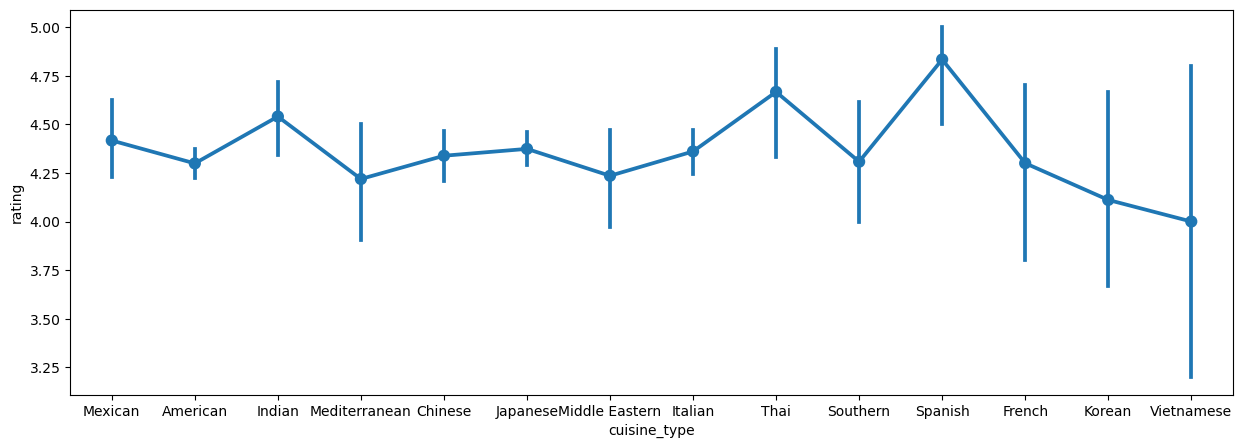

In [56]:
plt.figure(figsize=(15, 5))
sns.pointplot(data=df_rating, x='cuisine_type', y='rating');

### Cost of order and rating


*   On average, the higher the rating of an order, the mean order cost is higher. This makes sense as expensive orders from well established restaurants are likely to get higher ratings.
*   Orders with a rating of 3 have a huge variance in order cost compared to other ratings.




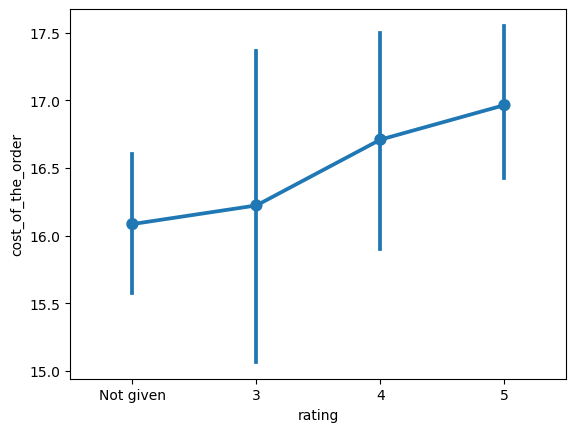

In [57]:
# Create a list to order the ratings on the x-axis of plots
rating_order = ['Not given', '3', '4', '5']
sns.pointplot(data=df, x='rating', y='cost_of_the_order', order=rating_order);

### Food preparation time and rating
*   On average, the higher the rating of an order, the lower is the mean food preparation time. This makes sense because if orders get prepared and delivered fast, they are likely to get higher ratings.
*   Orders with a rating of 3 have a huge variance in food preparation time compared to other ratings.


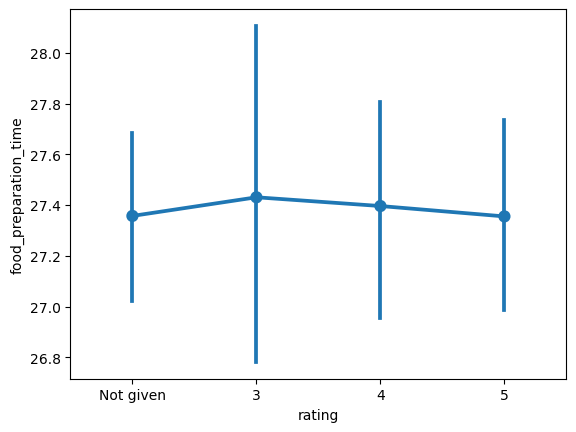

In [58]:
sns.pointplot(data=df, x='rating', y='food_preparation_time', order=rating_order);

### Delivery time and rating

*   Orders with a rating of 4 have a lower mean delivery time than orders with rating of 3. This is expected as a fast delivery can mean a higher rating.
*   However, orders with rating 5 actually have a higher mean delivery time than orders with rating 4 which is counterintuitive. This may be due to factors not represented in the data like traffic, weather conditions, difficulty in finding the delivery location etc.




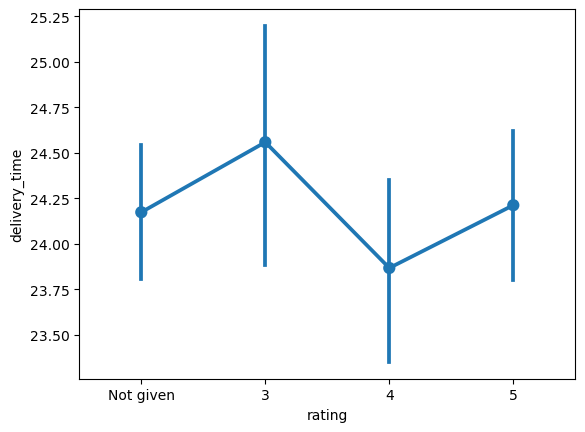

In [59]:
sns.pointplot(data=df, x='rating', y='delivery_time', order=rating_order);

### Heatmap for correlation between numerical variables

*   We should not consider correlation values for order_id and customer_id as these are unique identifiers.
*   All other correlations values are very weak and hence we cannot draw any conclusions.

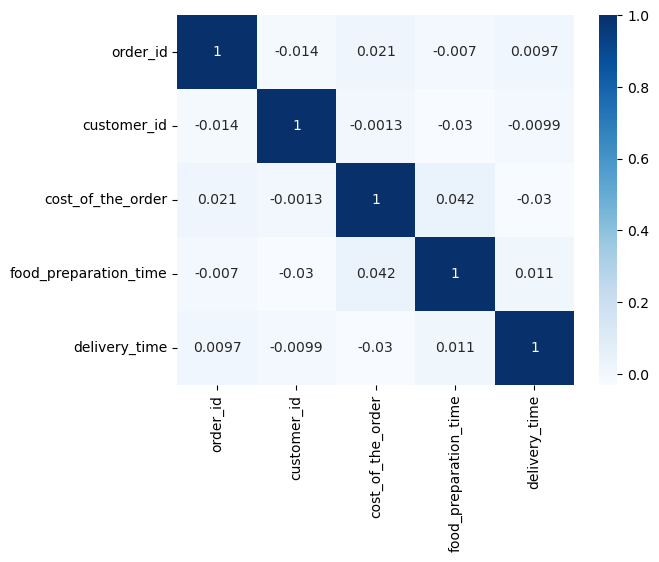

In [60]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

The qualifying restaurants for the promotional offer are The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi.

In [61]:
# Use the df_rating dataframe created earlier which doesn't have the orders with missing ratings
# Create a new dataframe with the restaurant names and their total rating counts
df_rating_freq = df_rating.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_freq.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [62]:
# Get list of restaurant names with > 50 ratings
rest_list = df_rating_freq[df_rating_freq['rating']>50]['restaurant_name'] #I could have hard-coded the list but this makes the code scalable when no. of ratings increase on the platform
rest_list

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [63]:
# Apply second filter to df_rating to get order data of restaurants > 50 ratings
df_rating_50 = df_rating[df_rating['restaurant_name'].isin(rest_list)].copy()

# Get the average rating of each restaurant with >50 ratings
df_rating_50.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

# Luckily all 4 restaurants have an average rating higher than 4 so the second condition for the promotion is also satisfied

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

The net revenue generated by the company across all orders is $6,166.30

In [64]:
# New function to calculate revenue based on conditions given
def get_revenue(cost):
  if cost > 20:
    return cost*0.25
  elif cost > 5:
    return cost*0.15
  else:
    return 0

# Apply revenue function to the cost column and add result as new revenue column
df['revenue'] = df['cost_of_the_order'].apply(get_revenue)

# Calculate sum of all revenues per order
round(df['revenue'].sum(),2)

6166.3

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

10.54% of the orders take more than 60 minutes to get delivered.

In [65]:
# Add a new column that totals food prep time and delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Find % of total orders having total time > 60 minutes
round( ( df[df['total_time']>60].shape[0] / df.shape[0]) *100, 2)

10.54

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

The mean delivery time on Weekdays is around 28 minutes which is 26.12% higher than the mean delivery time on Weekends. The mean delivery time on Weekends is 22.47 minutes. This may be due to factors not represented in the data like traffic, weather conditions, difficulty in finding the delivery location etc.

In [66]:
df.groupby(['day_of_the_week'])['delivery_time'].mean().reset_index()

,day_of_the_week,delivery_time
0,Weekday,28.340037
1,Weekend,22.470022


In [67]:
round(((28.34-22.47)/22.47)*100,2)

26.12

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* 87.58% of the customers have ordered only once or twice. Only 149 customers have ordered 3 or more times.
* Total spend per customer ranges from \$4.75 to \$225.8, with a mean of \$26.
* The total cost of all orders is \$31,314.82. 50% of the orders cost between \$10 and \$20 with the highest order cost at \$35.
* 71.18% of all orders are placed on weekends.
* On average, the higher the rating of an order, the lower is the mean food preparation time.
* The mean delivery time on Weekdays is around 28 minutes which is 26.12% higher than the mean delivery time on Weekends.
* Almost 70% of all orders take between 20 to 30 minutes to deliver. 10.54% of the orders take more than 60 minutes to get delivered.
* Most popular cuisines are American, Japanese and Italian, on weekdays and weekends. These cuisines account for 71.23% of all orders.
* Highest rated cuisine types are Spanish, Thai, Indian, Mexican and Japanese. Lowest rated cuisine types are American, Middle Eastern, Mediterranean, Korean and Vietnamese.
* 39% of all orders are not rated. 30.9% of all orders had a rating of 5.


### Recommendations:

  1. Add notifications on ongoing restaurant promotions to encourage the 87.58% customers who ordered only once or twice to explore more restaurants and order more.
  2. For the 149 customers who have ordered 3 or more times, show  recommendations in-app for most popular restuarants and highest rated cuisines. Add a loyalty program to increase repeat orders.
  3. Spend per customer maxes out at $35 so there is opportunity to offer dicounts for larger group or family orders, especially for the top cuisines American, Japanese and Italian, as that would mean more revenue for food hub.
  4. 39% of orders did not receive any ratings which is a big opportunity to gain additional insights on cuisines and restaurants. Make the rating process smother and incentivize customers to add ratings to their orders at various points: order placed, right after the food is delivered, at next login for the previous order quality. Each rating provided can award loyalty points and enough accumulated points can be exchanged for order discounts.
  5. Test and introduce promotional programs on Weekdays like 'Taco Tuesdays' to increase order volume on weekdays.
  6. Investigate slowness in delivery and consider increasing size of delivery personnel fleet, discount on pick-up orders or other solutions.
  7. Introduce incentives for restaurants with low ratings to improve and optimize their food quality, preparation time, menu offerings etc. that can improve their rating on the platform.
  8. Spanish, Thai and Indian cuisine restaurants are top rated but have low total # of orders. Recommend these specially on the app as top-rated or most popular cuisines to increase no. of orders.

---